# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Вам нужно научиться определять рыночную стоимость объектов недвижимости. Для этого проведите исследовательский анализ данных и установите параметры, влияющие на цену объектов. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта и других объектов — эти данные автоматически получены из геосервисов. Количество парков и водоёмов также заполняется без участия пользователя.

### Откройте файл с данными и изучите общую информацию

In [1]:
import pandas as pd
df = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#выводим 5 первых строк таблицы 

df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [3]:
#смотрим типы столбцов 

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

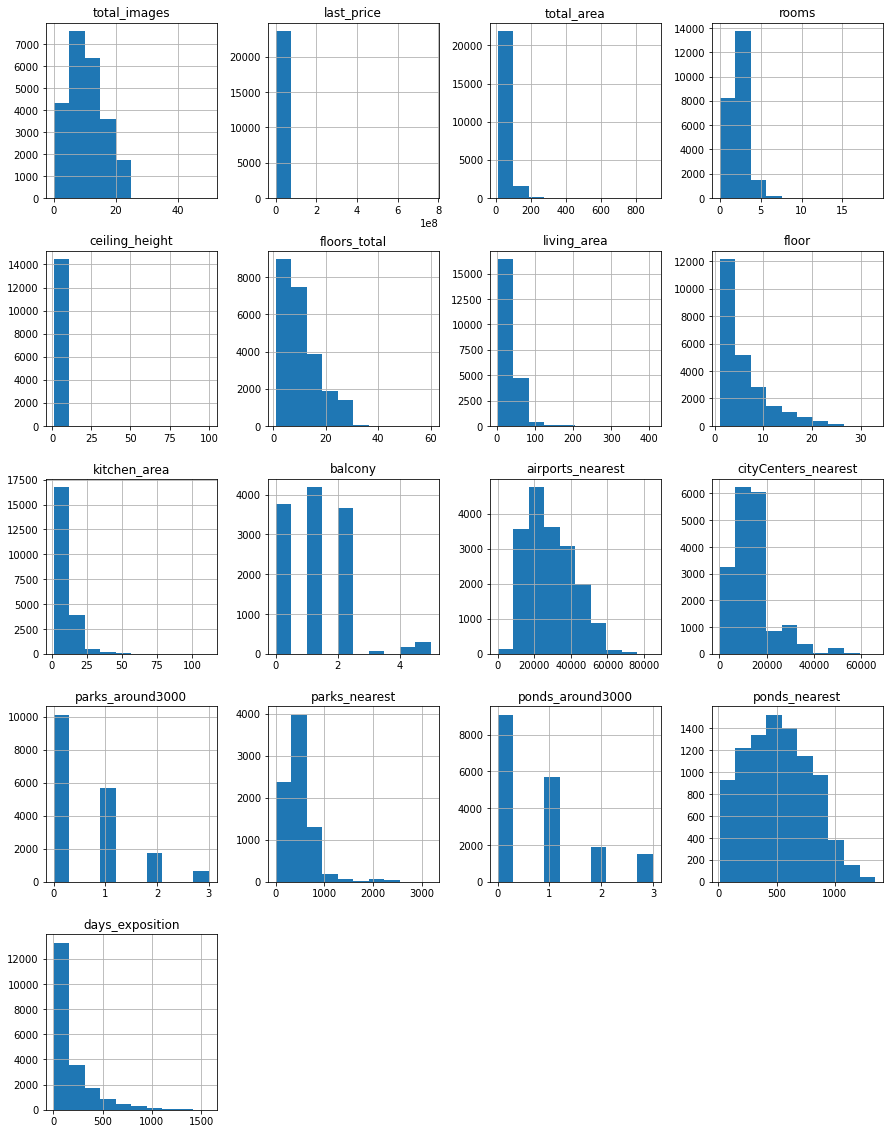

In [4]:
# Построение гистограммы для всех числовых столбцов таблицы
df.hist(figsize=(15, 20))
plt.show()

### Выполните предобработку данных

Определите, в каких столбцах есть пропуски: 

ceiling_height        14504 non-null  float64

floors_total          23613 non-null  float64

living_area           21796 non-null  float64

is_apartment          2775 non-null   object 

kitchen_area          21421 non-null  float64

balcony               12180 non-null  float64

locality_name         23650 non-null  object

airports_nearest      18157 non-null  float64

cityCenters_nearest   18180 non-null  float64

parks_around3000      18181 non-null  float64

parks_nearest         8079 non-null   float64

ponds_around3000      18181 non-null  float64

ponds_nearest         9110 non-null   float64

days_exposition       20518 non-null  float64

In [5]:
df.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [6]:
df.isnull().mean()*100

total_images             0.000000
last_price               0.000000
total_area               0.000000
first_day_exposition     0.000000
rooms                    0.000000
ceiling_height          38.799105
floors_total             0.362885
living_area              8.029875
floor                    0.000000
is_apartment            88.290645
studio                   0.000000
open_plan                0.000000
kitchen_area             9.612220
balcony                 48.605426
locality_name            0.206760
airports_nearest        23.384953
cityCenters_nearest     23.287902
parks_around3000        23.283683
parks_nearest           65.909954
ponds_around3000        23.283683
ponds_nearest           61.559559
days_exposition         13.422507
dtype: float64

In [7]:
df['balcony'] = df.fillna(0) #убираем пропуски в балконах
df['parks_around3000'] = df.fillna(0) #убираем пропуски в парках

df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,20,Санкт-Петербург,18863.0,16028.0,20,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,7,посёлок Шушары,12817.0,18603.0,7,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,10,Санкт-Петербург,21741.0,13933.0,10,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0,Санкт-Петербург,28098.0,6800.0,0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,2,Санкт-Петербург,31856.0,8098.0,2,112.0,1.0,48.0,121.0


**Вывод:**

ceiling_height: высота потолков - пропущенное значение неизвестно

living_area:жилая площадь - пропущенное значение неизвестно

is_apartmen kitchen_area: площадь кухни - пропущенное значение неизвестно. Коррелиует с living_area и total_area

balcony: количество балконов. Пропущенное значение означает, что балконов нет, заменяем на 0

airports_nearest: расстояние до аэропорта. Пропущенное значение означает, что аэропорта поблизости нет

cityCenters_nearest: расстояние до центра. Пропущенное значение означает, что аэропорта поблизости нет

parks_around3000: есть ли рядом парк.  Пропущенное значение означает, что парка поблизости нет

parks_nearest: расстояние до парка. Пропущенное значение означает, что парка поблизости нет, заменяем на 0

ponds_around3000: есть ли рядом пруд.  Пропущенное значение означает, что пруда поблизости нет, заменяем на 0

ponds_nearest расстояние до пруда. Пропущенное значение означает, что пруда поблизости нет

days_exposition: дни показа - пропущенное значение неизвестно


In [8]:
# Если значения площади коррелирую с общей, то их можно попробовать восстановить. Восстанови пропуски в жилой площади и площади кухни.

    
for t in df['rooms'].unique():
    df.loc[(df['rooms'] == t) & (df['living_area'].isna()), 'living_area'] = \
    df.loc[(df['rooms'] == t), 'living_area'].median()
    
for t in df['rooms'].unique():
    df.loc[(df['rooms'] == t) & (df['kitchen_area'].isna()), 'kitchen_area'] = \
    df.loc[(df['rooms'] == t), 'kitchen_area'].median()
    
df.head(20)

/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,20,Санкт-Петербург,18863.0,16028.0,20,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,7,посёлок Шушары,12817.0,18603.0,7,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,10,Санкт-Петербург,21741.0,13933.0,10,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,45.00,9,NaN,...,9.50,0,Санкт-Петербург,28098.0,6800.0,0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,2,Санкт-Петербург,31856.0,8098.0,2,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,10,городской посёлок Янино-1,NaN,NaN,10,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,6,посёлок Парголово,52996.0,19143.0,6,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,30.50,22,NaN,...,18.90,5,Санкт-Петербург,23982.0,11634.0,5,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,20,посёлок Мурино,NaN,NaN,20,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,18,Санкт-Петербург,50898.0,15008.0,18,NaN,0.0,NaN,289.0


In [9]:
#пропуск в населенных пунктах может означать то, что квартира находится в Санкт-Петербурге или вне населенного пункта

df['locality_name'] = df['locality_name'].fillna('Санкт-Петербург') 

df.head(40)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,20,Санкт-Петербург,18863.0,16028.0,20,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,7,посёлок Шушары,12817.0,18603.0,7,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,10,Санкт-Петербург,21741.0,13933.0,10,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,45.00,9,NaN,...,9.50,0,Санкт-Петербург,28098.0,6800.0,0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,2,Санкт-Петербург,31856.0,8098.0,2,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,10,городской посёлок Янино-1,NaN,NaN,10,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,6,посёлок Парголово,52996.0,19143.0,6,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,30.50,22,NaN,...,18.90,5,Санкт-Петербург,23982.0,11634.0,5,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,20,посёлок Мурино,NaN,NaN,20,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,18,Санкт-Петербург,50898.0,15008.0,18,NaN,0.0,NaN,289.0


In [10]:
df['floor'] = df['floor'].astype('float')
df['floors_total'] = df['floors_total'].astype('float')

floor_count = df[df['floors_total'] < df['floor']]['floors_total'].count()
floor_count

0

In [11]:
# v3
# Что можно сказать о пропусках в этажности дома и населенных пунктах?
# заменяем пропуски этажности на этаж квартиры 


df['floors_total'] = df['floors_total'].fillna(df['floor']) 
df.head()


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8.0,NaN,...,25.0,20,Санкт-Петербург,18863.0,16028.0,20,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1.0,NaN,...,11.0,7,посёлок Шушары,12817.0,18603.0,7,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4.0,NaN,...,8.3,10,Санкт-Петербург,21741.0,13933.0,10,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,45.0,9.0,NaN,...,9.5,0,Санкт-Петербург,28098.0,6800.0,0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13.0,NaN,...,41.0,2,Санкт-Петербург,31856.0,8098.0,2,112.0,1.0,48.0,121.0


In [12]:
df.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total                0
living_area                 0
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area              197
balcony                     0
locality_name               0
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000            0
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [13]:
# меняем тип данных в днях показа со строки на дату 
df['first_day_exposition'] = pd.to_datetime(
    df['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')


df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8.0,NaN,...,25.0,20,Санкт-Петербург,18863.0,16028.0,20,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04,1,NaN,11.0,18.6,1.0,NaN,...,11.0,7,посёлок Шушары,12817.0,18603.0,7,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20,2,NaN,5.0,34.3,4.0,NaN,...,8.3,10,Санкт-Петербург,21741.0,13933.0,10,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24,3,NaN,14.0,45.0,9.0,NaN,...,9.5,0,Санкт-Петербург,28098.0,6800.0,0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13.0,NaN,...,41.0,2,Санкт-Петербург,31856.0,8098.0,2,112.0,1.0,48.0,121.0


In [14]:
df.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total                0
living_area                 0
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area              197
balcony                     0
locality_name               0
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000            0
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [15]:
#смотрим тип данных в столбцах

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  float64       
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        14504 non-null  float64       
 6   floors_total          23699 non-null  float64       
 7   living_area           23699 non-null  float64       
 8   floor                 23699 non-null  float64       
 9   is_apartment          2775 non-null   object        
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          23502 non-null  float64       
 13  balcony         

In [16]:
# меняем тип данных в количестве балконов с дроби на целое число 
df['balcony'] = df['balcony'].astype('int')

df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8.0,NaN,...,25.0,20,Санкт-Петербург,18863.0,16028.0,20,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04,1,NaN,11.0,18.6,1.0,NaN,...,11.0,7,посёлок Шушары,12817.0,18603.0,7,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20,2,NaN,5.0,34.3,4.0,NaN,...,8.3,10,Санкт-Петербург,21741.0,13933.0,10,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24,3,NaN,14.0,45.0,9.0,NaN,...,9.5,0,Санкт-Петербург,28098.0,6800.0,0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13.0,NaN,...,41.0,2,Санкт-Петербург,31856.0,8098.0,2,112.0,1.0,48.0,121.0


In [17]:
#смотрим тип данных в столбцах

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  float64       
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        14504 non-null  float64       
 6   floors_total          23699 non-null  float64       
 7   living_area           23699 non-null  float64       
 8   floor                 23699 non-null  float64       
 9   is_apartment          2775 non-null   object        
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          23502 non-null  float64       
 13  balcony         

некорректно отображалась дата - при типе "строка" мы не можем осуществлять математические операции. Тоже самое с количеством балконов

In [18]:
#смотрим количество уникальных значений

df['locality_name'].value_counts()

Санкт-Петербург       15770
посёлок Мурино          522
посёлок Шушары          440
Всеволожск              398
Пушкин                  369
                      ...  
посёлок Плоское           1
поселок Ромашки           1
поселок Коробицыно        1
деревня Тойворово         1
поселок Калитино          1
Name: locality_name, Length: 364, dtype: int64

In [19]:
#проверяем нет ли явных дубликатов

df.duplicated().sum()

0

In [20]:
#смотрим уникальные значения

df['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

In [21]:
#убираем букву "ё" в слове "посёлок"

df['locality_name'] = df['locality_name'] \
    .str.replace('посёлок', 'поселок')

df

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07,3,2.70,16.0,51.0,8.0,NaN,...,25.00,20,Санкт-Петербург,18863.0,16028.0,20,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04,1,NaN,11.0,18.6,1.0,NaN,...,11.00,7,поселок Шушары,12817.0,18603.0,7,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20,2,NaN,5.0,34.3,4.0,NaN,...,8.30,10,Санкт-Петербург,21741.0,13933.0,10,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24,3,NaN,14.0,45.0,9.0,NaN,...,9.50,0,Санкт-Петербург,28098.0,6800.0,0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19,2,3.03,14.0,32.0,13.0,NaN,...,41.00,2,Санкт-Петербург,31856.0,8098.0,2,112.0,1.0,48.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21,3,3.70,5.0,73.3,3.0,NaN,...,13.83,9,Санкт-Петербург,24665.0,4232.0,9,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15,3,NaN,5.0,38.0,4.0,NaN,...,8.50,14,Тосно,NaN,NaN,14,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11,2,NaN,3.0,29.7,1.0,NaN,...,8.80,18,село Рождествено,NaN,NaN,18,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28,2,3.00,17.0,30.5,12.0,NaN,...,23.30,13,Санкт-Петербург,39140.0,10364.0,13,173.0,3.0,196.0,602.0


In [22]:
#опять смотрим уникальные значения

df['locality_name'].unique()

array(['Санкт-Петербург', 'поселок Шушары', 'городской поселок Янино-1',
       'поселок Парголово', 'поселок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'поселок Металлострой',
       'поселок городского типа Лебяжье',
       'поселок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'поселок Аннино',
       'поселок городского типа Ефимовский', 'поселок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'поселок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', 'поселок Новый Свет

In [23]:
#убираем повторы

df['locality_name'] = df['locality_name'].replace('Мурино', 'поселок Мурино')
df['locality_name'] = df['locality_name'].replace('Кудрово', 'деревня Кудрово')
df['locality_name'] = df['locality_name'].replace('городской поселок Советский', 'поселок городского типа Советский')
df['locality_name'] = df['locality_name'].replace('Никольское', 'село Никольское')
df['locality_name'] = df['locality_name'].replace('поселок городского типа Никольский', 'село Никольское')
df['locality_name'] = df['locality_name'].replace('деревня Фёдоровское', 'городской поселок Фёдоровское')
df['locality_name'] = df['locality_name'].replace('поселок городского типа Рощино', 'поселок городского типа Рощино')
df['locality_name'] = df['locality_name'].replace('городской поселок Рощино', 'поселок городского типа Рощино')
df['locality_name'] = df['locality_name'].replace('село Павлово', 'поселок городского типа Павлово')
df['locality_name'] = df['locality_name'].replace('городской поселок Павлово', 'поселок городского типа Павлово')
df['locality_name'] = df['locality_name'].replace('городской поселок Большая Ижора', 'поселок городского типа Большая Ижора')
df['locality_name'] = df['locality_name'].replace('поселок городского типа Лесогорский', 'городской поселок Лесогорский')
df['locality_name'] = df['locality_name'].replace('поселок городского типа Лесогорский', 'городской поселок Лесогорский')
df['locality_name'] = df['locality_name'].replace('деревня Зимитицы', 'поселок Зимитицы')
df['locality_name'] = df['locality_name'].replace('поселок Рябово', 'поселок городского типа Рябово')
df['locality_name'] = df['locality_name'].replace('поселок городского типа Мга', 'городской поселок Мга')
df['locality_name'] = df['locality_name'].replace('поселок при железнодорожной станции Вещево', 'поселок станции Вещево')
df['locality_name'] = df['locality_name'].replace('деревня Калитино', 'поселок Калитино')
df['locality_name'] = df['locality_name'].replace('деревня Щеглово', 'поселок Щеглово')
df['locality_name'] = df['locality_name'].replace('деревня Рабитицы', 'поселок Рабитицы')
df['locality_name'] = df['locality_name'].replace('городской поселок Назия', 'поселок городского типа Назия')
df['locality_name'] = df['locality_name'].replace('деревня Гарболово', 'поселок Гарболово')
df['locality_name'] = df['locality_name'].replace('поселок при железнодорожной станции Приветнинское', 'поселок станции Приветнинское')
df['locality_name'] = df['locality_name'].replace('Любань', 'поселок Любань')
df['locality_name'] = df['locality_name'].replace('коттеджный поселок Лесное', 'поселок Лесное')                                               
df['locality_name'] = df['locality_name'].replace('поселок станции Громово', 'поселок Громово')

df

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07,3,2.70,16.0,51.0,8.0,NaN,...,25.00,20,Санкт-Петербург,18863.0,16028.0,20,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04,1,NaN,11.0,18.6,1.0,NaN,...,11.00,7,поселок Шушары,12817.0,18603.0,7,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20,2,NaN,5.0,34.3,4.0,NaN,...,8.30,10,Санкт-Петербург,21741.0,13933.0,10,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24,3,NaN,14.0,45.0,9.0,NaN,...,9.50,0,Санкт-Петербург,28098.0,6800.0,0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19,2,3.03,14.0,32.0,13.0,NaN,...,41.00,2,Санкт-Петербург,31856.0,8098.0,2,112.0,1.0,48.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21,3,3.70,5.0,73.3,3.0,NaN,...,13.83,9,Санкт-Петербург,24665.0,4232.0,9,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15,3,NaN,5.0,38.0,4.0,NaN,...,8.50,14,Тосно,NaN,NaN,14,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11,2,NaN,3.0,29.7,1.0,NaN,...,8.80,18,село Рождествено,NaN,NaN,18,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28,2,3.00,17.0,30.5,12.0,NaN,...,23.30,13,Санкт-Петербург,39140.0,10364.0,13,173.0,3.0,196.0,602.0


In [24]:
#смотрим получившееся количество уникальных значений. Оно уменьшилось с 364 до 306

df['locality_name'].value_counts().head(10)

Санкт-Петербург      15770
поселок Мурино         590
деревня Кудрово        472
поселок Шушары         440
Всеволожск             398
Пушкин                 369
Колпино                338
поселок Парголово      327
Гатчина                307
Выборг                 237
Name: locality_name, dtype: int64

### Добавьте в таблицу новые столбцы

In [25]:
#добавляем столбец цены за кв. м

df['price_for_area'] = df['last_price'] / df['total_area']
df['price_for_area'] = df['price_for_area'].round(2)

In [26]:
#добавляем столбец день недели публикации объявления 

df['weekday_expozition'] = df['first_day_exposition'].dt.weekday

In [27]:
#добавляем столбец месяц недели публикации объявления 

df['month_expozition'] = df['first_day_exposition'].dt.month 

In [28]:
#добавляем столбец год недели публикации объявления и выводим полученную таблицу на экран

df['year_expozition'] = df['first_day_exposition'].dt.year 
df

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_for_area,weekday_expozition,month_expozition,year_expozition
0,20,13000000.0,108.00,2019-03-07,3,2.70,16.0,51.0,8.0,NaN,...,16028.0,20,482.0,2.0,755.0,NaN,120370.37,3,3,2019
1,7,3350000.0,40.40,2018-12-04,1,NaN,11.0,18.6,1.0,NaN,...,18603.0,7,NaN,0.0,NaN,81.0,82920.79,1,12,2018
2,10,5196000.0,56.00,2015-08-20,2,NaN,5.0,34.3,4.0,NaN,...,13933.0,10,90.0,2.0,574.0,558.0,92785.71,3,8,2015
3,0,64900000.0,159.00,2015-07-24,3,NaN,14.0,45.0,9.0,NaN,...,6800.0,0,84.0,3.0,234.0,424.0,408176.10,4,7,2015
4,2,10000000.0,100.00,2018-06-19,2,3.03,14.0,32.0,13.0,NaN,...,8098.0,2,112.0,1.0,48.0,121.0,100000.00,1,6,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21,3,3.70,5.0,73.3,3.0,NaN,...,4232.0,9,796.0,3.0,381.0,NaN,72490.85,1,3,2017
23695,14,3100000.0,59.00,2018-01-15,3,NaN,5.0,38.0,4.0,NaN,...,NaN,14,NaN,NaN,NaN,45.0,52542.37,0,1,2018
23696,18,2500000.0,56.70,2018-02-11,2,NaN,3.0,29.7,1.0,NaN,...,NaN,18,NaN,NaN,NaN,NaN,44091.71,6,2,2018
23697,13,11475000.0,76.75,2017-03-28,2,3.00,17.0,30.5,12.0,NaN,...,10364.0,13,173.0,3.0,196.0,602.0,149511.40,1,3,2017


In [29]:
#добавляем столбец "тип этажа квартиры"

def get_floor_type(row):
    if row['floor'] == 1:
        return 'first'
    elif row['floor'] == row['floors_total']:
        return 'last'
    else:
        return 'other'

df['floor_type'] = df.apply(get_floor_type, axis=1)
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_for_area,weekday_expozition,month_expozition,year_expozition,floor_type
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8.0,NaN,...,20,482.0,2.0,755.0,NaN,120370.37,3,3,2019,other
1,7,3350000.0,40.4,2018-12-04,1,NaN,11.0,18.6,1.0,NaN,...,7,NaN,0.0,NaN,81.0,82920.79,1,12,2018,first
2,10,5196000.0,56.0,2015-08-20,2,NaN,5.0,34.3,4.0,NaN,...,10,90.0,2.0,574.0,558.0,92785.71,3,8,2015,other
3,0,64900000.0,159.0,2015-07-24,3,NaN,14.0,45.0,9.0,NaN,...,0,84.0,3.0,234.0,424.0,408176.10,4,7,2015,other
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13.0,NaN,...,2,112.0,1.0,48.0,121.0,100000.00,1,6,2018,other


In [30]:
#добавляем столбец "расстояние до центра города в километрах"

df['centre_distance_km'] = (df['cityCenters_nearest']/1000).round(0)
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_for_area,weekday_expozition,month_expozition,year_expozition,floor_type,centre_distance_km
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8.0,NaN,...,482.0,2.0,755.0,NaN,120370.37,3,3,2019,other,16.0
1,7,3350000.0,40.4,2018-12-04,1,NaN,11.0,18.6,1.0,NaN,...,NaN,0.0,NaN,81.0,82920.79,1,12,2018,first,19.0
2,10,5196000.0,56.0,2015-08-20,2,NaN,5.0,34.3,4.0,NaN,...,90.0,2.0,574.0,558.0,92785.71,3,8,2015,other,14.0
3,0,64900000.0,159.0,2015-07-24,3,NaN,14.0,45.0,9.0,NaN,...,84.0,3.0,234.0,424.0,408176.10,4,7,2015,other,7.0
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13.0,NaN,...,112.0,1.0,48.0,121.0,100000.00,1,6,2018,other,8.0


### Проведите исследовательский анализ данных

<AxesSubplot:>

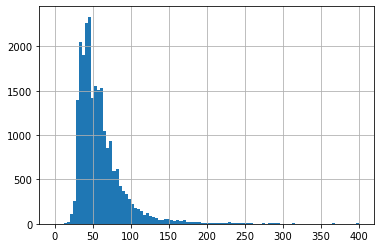

In [31]:
#строим гистограмму для общей площади 

df['total_area'].hist(bins=100,range = (0, 400))

гистограмма имеет два пика - квартиры с площадью 30-40 кв метров и квартиры площадью 50 70 кв метров. В принципе, это похоже на реальность - однокомнатные и двухкомнатные квартиры согласно гистограмме ниже лидируют в продажах

значения свышее 250 кв. метров можно отсечь как несущественные

In [32]:
#убираем из датафрейма значения с общей площадью больше 250

df = df.query('total_area <= 250')

<AxesSubplot:>

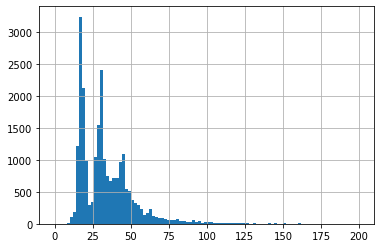

In [33]:
#строим гистограмму для жилой плошади

df['living_area'].hist(bins=100,range = (0, 200))


In [34]:
df.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,...,cityCenters_nearest,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_for_area,weekday_expozition,month_expozition,year_expozition,centre_distance_km
count,23587.000000,2.358700e+04,23587.000000,23587.000000,14431.000000,23587.000000,23587.000000,23587.000000,23391.000000,23587.000000,...,18070.000000,8010.000000,18071.000000,9032.000000,20429.000000,2.358700e+04,23587.000000,23587.000000,23587.000000,18070.000000
mean,9.845339,6.193135e+06,58.988055,2.051554,2.768030,10.690719,33.646262,5.895239,10.365213,9.845339,...,14234.425291,491.571036,0.766809,518.914194,180.348818,9.882725e+04,2.568322,6.400772,2017.368338,14.227670
std,5.674551,7.055975e+06,28.894634,1.028866,1.262532,6.599180,18.732232,4.888540,5.337556,5.674551,...,8604.407609,342.711981,0.936186,277.861131,219.109610,4.696572e+04,1.789322,3.491109,1.039047,8.612495
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,...,181.000000,1.000000,0.000000,13.000000,1.000000,1.118300e+02,0.000000,1.000000,2014.000000,0.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.510000,5.000000,18.315000,2.000000,7.300000,6.000000,...,9316.000000,288.000000,0.000000,295.000000,45.000000,7.653061e+04,1.000000,3.000000,2017.000000,9.000000
50%,9.000000,4.600000e+06,52.000000,2.000000,2.650000,9.000000,30.200000,4.000000,9.040000,9.000000,...,13138.000000,455.000000,0.000000,503.000000,95.000000,9.491525e+04,3.000000,6.000000,2017.000000,13.000000
75%,14.000000,6.700000e+06,69.100000,3.000000,2.800000,16.000000,42.400000,8.000000,11.500000,14.000000,...,16315.750000,613.000000,1.000000,731.000000,231.000000,1.140351e+05,4.000000,10.000000,2018.000000,16.000000
max,50.000000,3.300000e+08,250.000000,14.000000,100.000000,60.000000,220.000000,33.000000,107.000000,50.000000,...,65968.000000,3190.000000,3.000000,1344.000000,1580.000000,1.736842e+06,6.000000,12.000000,2019.000000,66.000000


гистограмма имеет три пика - около 18-20 кв метров и 30-40 кв метров. Что также соответствует параметрам для одно- и двух- комнатных квартир. 

Значениями свыше 130 можно перенебречь как не влияющими на выборку

Также следует убрать значения менее 10 как аномальные

In [35]:
#убираем из датафрейма значения с жилой площадью больше 150 и значения меньше 10

df = df.query('living_area >= 10')

<AxesSubplot:>

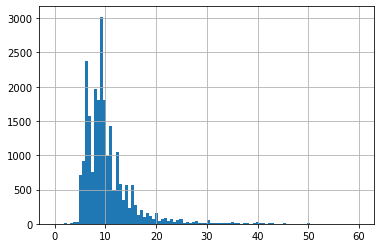

In [36]:
#строим гистограмму для площади кухни

df['kitchen_area'].hist(bins=100,range = (0, 60))

интересны значения до 5-ти метров. Мне кажется, что в эти значения попадают встроенные кухни или кухнии в студиях 

Интересен также пик на 30-32 метрах 

Пики на 6-7 метрах и 8-10 метрах соответствуют значениям для одно- и двух-комантных квартир

Значения свыше 35 можно отсечь как несущественные

<AxesSubplot:>

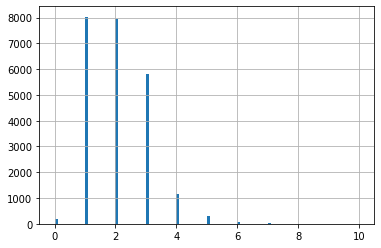

In [37]:
#строим гистограмму для количества комнат

df['rooms'].hist(bins=100,range = (0, 10))

мы видим, что максимальное количество квартир - одно и двух-команатные. На третьем месте - трехкомнатные 

А вот значение "0", на мой взгляд - это не аномалия, а скорее всего квартиры - студии (что подтверждает график площади кухни)

<AxesSubplot:>

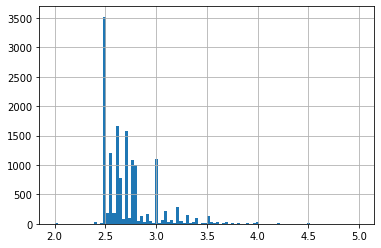

In [38]:
#строим гистограмму для высоты потолков

df['ceiling_height'].hist(bins=100, range = (2, 5))

мы видим, что пик приходится на потолки 2,3 - 2,5 метров. Что соответствует действительности. Значения свыше 3-х метров вызывали бы сомнения, если речь не шла бы о Санкт-Петербурге, где во многих домах на самом деле высокие потолки 

<AxesSubplot:>

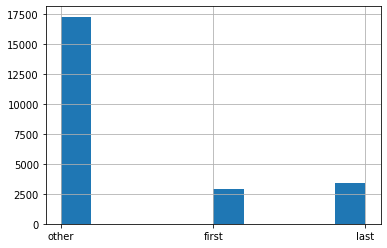

In [39]:
#строим гистограмму для типа этажа (первый, последний, другой)

df['floor_type'].hist()

большинство квартир находятся не на первых и не на последних этажах. На последний продается квартир чуть больше, чем на первых

по гистограме видим, что в основном квартиры находятся в пятиэтажках. Но есть и 8 и 9-ти этажки. А вот значения свыше 25 вызывают сомнения, но в Санкт - Петербурге было на самом деле построено несколько многоэтажных жилых комплексов с этажностью 20-35 этажей

<AxesSubplot:>

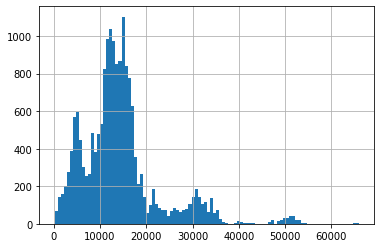

In [40]:
#строим гистограмму для расстояния до центра

df['cityCenters_nearest'].hist(bins=100)

гистограмма имеет три пика - 4-5 км,12-13 и интересный пик - 17 км
значения свыше 25-35 км показывают, скорее всего недвижимость в новых районах типа "Девяткино"
а значения  38 км - в пригородах


<AxesSubplot:>

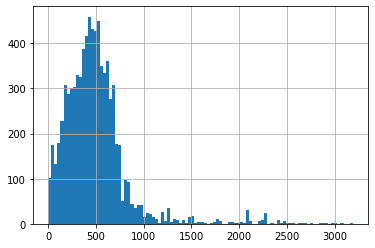

In [41]:
#строим гистограмму для расстояния до ближайшего парка

df['parks_nearest'].hist(bins=100)

мы видим пик около значения 500 метров. Также около 1 км видим небольшой пик, что может говорить о том, что люди, заполняя анкету, округляли данные до 1 км. Интересные пики в 2,2 и 2,3 км. 

Значения свыше 2500 можно убрать как несущественные

In [42]:
#df = df.query('parks_nearest <= 2500')

<AxesSubplot:>

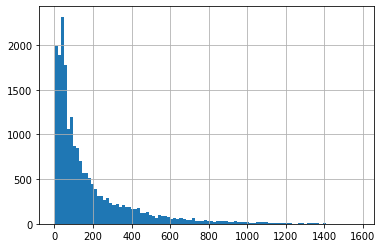

In [43]:
# Изучите, как быстро продавались квартиры (столбец days_exposition). 

df['days_exposition'].hist(bins=100)

<AxesSubplot:>

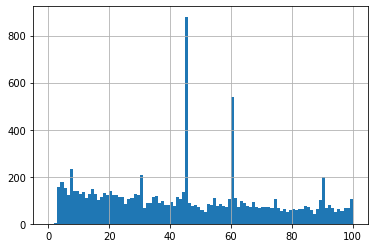

In [44]:
#Хотим детальнее изучить начало гистограммы  

df['days_exposition'].hist(bins=100, range = (0, 100))

мы видим несколько очень коротких сроков продаж - 1-2 дня, но это возможно в реальности.

Пики на 30, 45, 60 и 90 дней соответствуют платному пакетному размещению

In [45]:
# Посчитайте среднее 

df['days_exposition'].mean()

180.37908560787966

In [46]:
# Посчитайте медиану

df['days_exposition'].median()

95.0

мы видим преломление графика на среднем значении - 195 дней. Я бы считала значения, свыше этого долгими. Сверхдолгими - значения свыше 800 дней 

Значения до 5-ти дней я бы отнесла к сверхкоротким

(0.0, 1600.0)

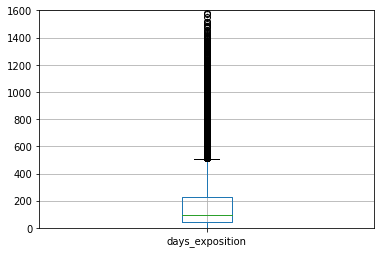

In [47]:
df.boxplot('days_exposition') 

import matplotlib.pyplot as plt 

plt.ylim(0, 1600)


Продолжительность от 3 до 550 дней может считаться нормальной

In [48]:
df['days_exposition'].describe()

count    20407.000000
mean       180.379086
std        219.189349
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64

In [49]:
#взаимосвязь цены от общей площади 

df['total_area'].corr(df['last_price'])

0.6703630661627812

<AxesSubplot:xlabel='total_area', ylabel='last_price'>

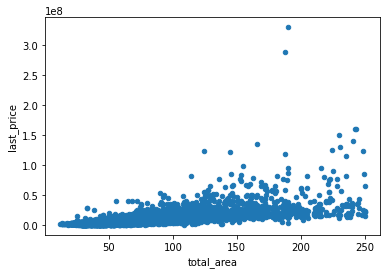

In [50]:
df.plot(x='total_area', y='last_price', kind='scatter') 

взаимосвязь присутствует, но невысокая

In [51]:
#взаимосвязь цены от жилой площади 

df['living_area'].corr(df['last_price'])

0.5604484051805858

<AxesSubplot:xlabel='living_area', ylabel='last_price'>

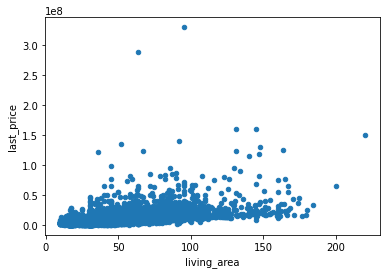

In [52]:
df.plot(x='living_area', y='last_price', kind='scatter') 

умеренная положительная связь

In [53]:
#взаимосвязь цены от площади кухни

df['kitchen_area'].corr(df['last_price'])

0.5082717878486245

<AxesSubplot:xlabel='kitchen_area', ylabel='last_price'>

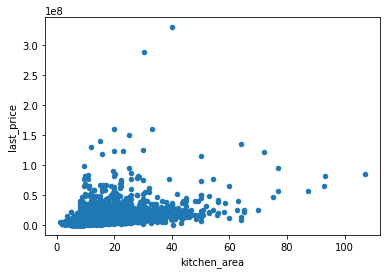

In [54]:
df.plot(x='kitchen_area', y='last_price', kind='scatter') 

умеренная положительная связь

умеренная положительная связь

<AxesSubplot:xlabel='rooms', ylabel='last_price'>

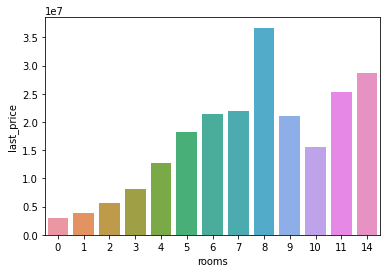

In [55]:
avg_prices = df.groupby('rooms')['last_price'].mean().reset_index()

# Построение барплота
sns.barplot(x='rooms', y='last_price', data=avg_prices)

<AxesSubplot:xlabel='floor_type', ylabel='last_price'>

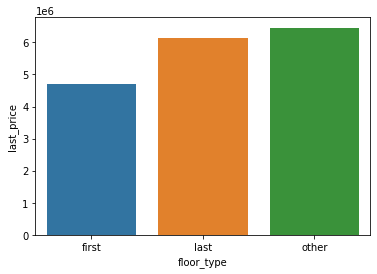

In [56]:
avg_prices = df.groupby('floor_type')['last_price'].mean().reset_index()

# Построение барплота
sns.barplot(x='floor_type', y='last_price', data=avg_prices)

<AxesSubplot:xlabel='weekday_expozition', ylabel='last_price'>

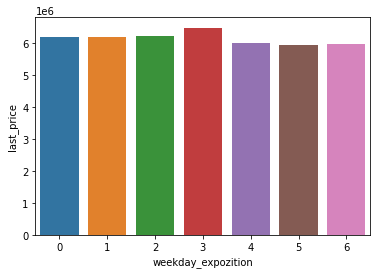

In [57]:
#взаимосвязь цены от времени показа

avg_prices = df.groupby('weekday_expozition')['last_price'].mean().reset_index()

# Построение барплота
sns.barplot(x='weekday_expozition', y='last_price', data=avg_prices)

<AxesSubplot:xlabel='month_expozition', ylabel='last_price'>

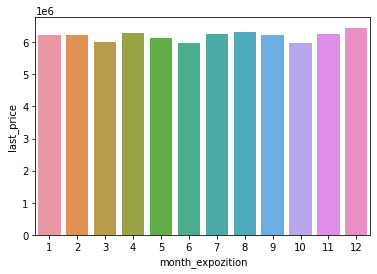

In [58]:
#взаимосвязь цены от времени показа

avg_prices = df.groupby('month_expozition')['last_price'].mean().reset_index()

# Построение барплота
sns.barplot(x='month_expozition', y='last_price', data=avg_prices)

<AxesSubplot:xlabel='year_expozition', ylabel='last_price'>

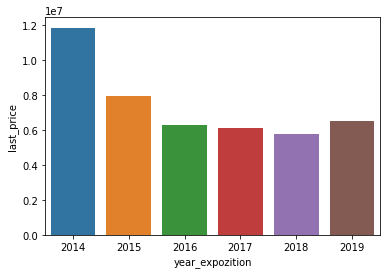

In [59]:
#взаимосвязь цены от времени показа

avg_prices = df.groupby('year_expozition')['last_price'].mean().reset_index()

# Построение барплота
sns.barplot(x='year_expozition', y='last_price', data=avg_prices)

array([[<AxesSubplot:xlabel='days_exposition', ylabel='days_exposition'>,
        <AxesSubplot:xlabel='kitchen_area', ylabel='days_exposition'>,
        <AxesSubplot:xlabel='living_area', ylabel='days_exposition'>,
        <AxesSubplot:xlabel='rooms', ylabel='days_exposition'>,
        <AxesSubplot:xlabel='total_area', ylabel='days_exposition'>],
       [<AxesSubplot:xlabel='days_exposition', ylabel='kitchen_area'>,
        <AxesSubplot:xlabel='kitchen_area', ylabel='kitchen_area'>,
        <AxesSubplot:xlabel='living_area', ylabel='kitchen_area'>,
        <AxesSubplot:xlabel='rooms', ylabel='kitchen_area'>,
        <AxesSubplot:xlabel='total_area', ylabel='kitchen_area'>],
       [<AxesSubplot:xlabel='days_exposition', ylabel='living_area'>,
        <AxesSubplot:xlabel='kitchen_area', ylabel='living_area'>,
        <AxesSubplot:xlabel='living_area', ylabel='living_area'>,
        <AxesSubplot:xlabel='rooms', ylabel='living_area'>,
        <AxesSubplot:xlabel='total_area', ylabel='livi

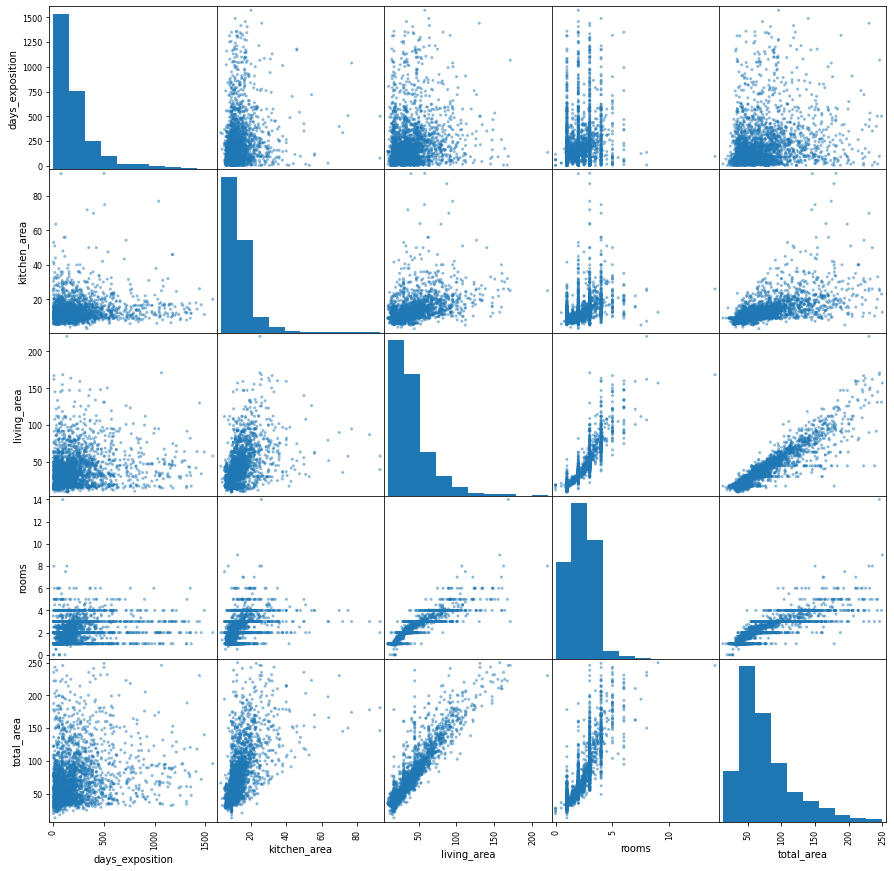

In [60]:
#строим графики зависимости цены от указанных выше параметров


floor_type_multi = df.pivot_table(index='last_price', values=['floor_type','days_exposition','rooms','kitchen_area','living_area', 'total_area'])

floor_type_multi.corr()

pd.plotting.scatter_matrix(floor_type_multi, figsize=(15, 15)) 

In [61]:
df['price_per_sqm'] = df['last_price'] / df['total_area']

# Выберем 10 населенных пунктов с наибольшим числом объявлений
top_localities = df['locality_name'].value_counts().head(10).index

# Посчитаем среднюю цену за квадратный метр для каждого населенного пункта
avg_price_per_sqm = df.query('locality_name in @top_localities').groupby('locality_name')['price_per_sqm'].mean()

# Построим сводную таблицу

df = pd.DataFrame(df)

number_of_ads = df['locality_name'].value_counts()

pivot_table = pd.DataFrame({'number_of_ads': number_of_ads, 'avg_price_per_sqm': avg_price_per_sqm})

pivot_table = pivot_table.sort_values(by='avg_price_per_sqm', ascending=False).round(0)

# Найдем населенные пункты с самой высокой и низкой стоимостью за квадратный метр
highest_price_per_sqm_loc = pivot_table['avg_price_per_sqm'].idxmax()
lowest_price_per_sqm_loc = pivot_table['avg_price_per_sqm'].idxmin()

# Выведем сводную таблицу и выделенные населенные пункты
print(pivot_table.head(10))

print(f'Населенный пункт с самой высокой ценой за квадратный метр: {highest_price_per_sqm_loc}')
print(f'Населенный пункт с самой низкой ценой за квадратный метр: {lowest_price_per_sqm_loc}')

                   number_of_ads  avg_price_per_sqm
Санкт-Петербург            15640           113945.0
Пушкин                       367           103131.0
деревня Кудрово              472            95325.0
поселок Парголово            327            90176.0
поселок Мурино               589            86062.0
поселок Шушары               439            78703.0
Колпино                      337            75333.0
Гатчина                      307            68746.0
Всеволожск                   398            68654.0
Выборг                       237            58142.0
Населенный пункт с самой высокой ценой за квадратный метр: Санкт-Петербург
Населенный пункт с самой низкой ценой за квадратный метр: Выборг


в большей степени на стоимость квартиры влияют размеры общей и жилой площади

площадь кухни и количество комнат влияют в меньшей степени

самая низкая стоимость квартир, расположенных на первом этаже. Самая высокая - у квартир, расположенных НЕ на 1-ом и последнем этажах

месяц и день недели размещения объявления не влияют на стоимость квартиры. Максимальные стоимости квартир были в 2014 годах, затем наблюдалась тенденция снижения стоимости до 2017 года включительно. И в 2018 и в 2019 заметен рост стоимости квартир

В Санкт-Петербурге высокая стоимость как у столицы. В Выборге - с наибольшей удаленностью от центра. А в деревнях наверняка продаются дома, стоимость которых выше

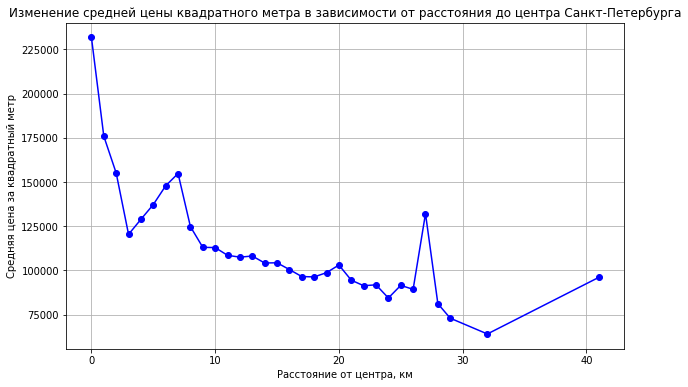

In [62]:

# Фильтруем данные для квартир в Санкт-Петербурге
spb_apartments = df[df['locality_name'] == 'Санкт-Петербург']

# Группируем данные по расстоянию от центра и вычисляем среднюю цену
avg_price_per_km = spb_apartments.groupby('centre_distance_km')['price_per_sqm'].mean()

# Строим график изменения средней цены для каждого километра от центра
plt.figure(figsize=(10, 6))
plt.plot(avg_price_per_km, marker='o', color='b')
plt.xlabel('Расстояние от центра, км')
plt.ylabel('Средняя цена за квадратный метр')
plt.title('Изменение средней цены квадратного метра в зависимости от расстояния до центра Санкт-Петербурга')
plt.grid(True)
plt.show()

На графике видно, что максимальная средняя стоимость кв метра у квартир в центре и в 2 км от него.  На втором месте - квартиры, располагающиеся в 7 км от центра. Третье место занимают квартиры, расположенные в 26 км от города, что связано, скорее всего, с элитными новостройками. Также поднятие цены в удаленности 40 км от цента может быть обусловлено постройкой новых элитных жилых комплексов

В целом, заметно падение уровня цены с удаленностью от центра

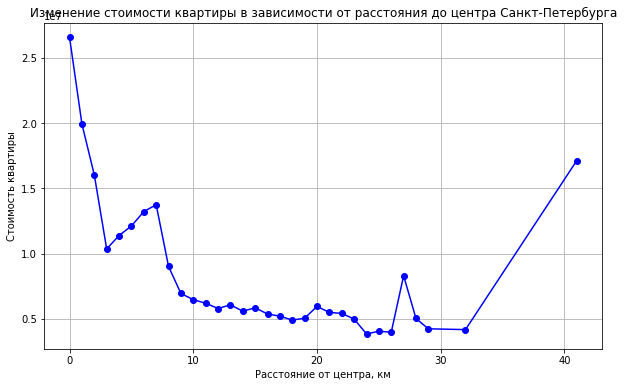

In [63]:
# Фильтруем данные для квартир в Санкт-Петербурге
spb_apartments = df[df['locality_name'] == 'Санкт-Петербург']

# Группируем данные по расстоянию от центра и вычисляем среднюю стоимость
avg_price = spb_apartments.groupby('centre_distance_km')['last_price'].mean()

# Строим график изменения средней цены для каждого километра от центра
plt.figure(figsize=(10, 6))
plt.plot(avg_price, marker='o', color='b')
plt.xlabel('Расстояние от центра, км')
plt.ylabel('Стоимость квартиры')
plt.title('Изменение стоимости квартиры в зависимости от расстояния до центра Санкт-Петербурга')
plt.grid(True)
plt.show()

На графике видно, что максимальная средняя стоимость квартир в центре и в 2 км от него.  На втором месте - квартиры, располагающиеся в 7 км от центра. Третье место занимают квартиры, расположенные в удаленности 40 км от центра, что может быть обусловлено постройкой новых элитных жилых комплексов с большими жилыми площадьми и большими кухнями. Также есть пик среди квартир, которые находятся в 26 км от центра, что связано, скорее всего, с элитными новостройками.

В целом, заметно падение уровня цены с удаленностью от центра

### Напишите общий вывод

В ходе исследования выявлено: 

* в большей степени на стоимость квартиры влияют размеры общей и жилой площади

* площадь кухни и количество комнат влияют в меньшей степени

* в основном квартиры находятся в домах, где 5 или 9 этажей

* в основном продаются 1 и 2-х комнатные квартиры 

* удаленность от центра практически не влияет на общую стоимость квартиры

* максимальная стоимость у квартир в центре и в 2 км от него. На втором месте занимают квартиры, расположенные в 26 км от города, что связано, скорее всего, с элитными новостройками. На третьем месте - квартиры, располагающиеся в 7 км от центра. В целом, заметно падение уровня цены с удаленностью от центра

* населенный пункт с самой высокой ценой за квадратный метр: Санкт-Петербург. Населенный пункт с самой низкой ценой за квадратный метр: Колпино

* средний срок продажи квартиры составляет 195 дней, медианный - 108 дней. Но иногда квартиры продаются и менее, чем за неделю 
